# Regra dos Trapézios por número de iterações

#### Importando bibliotecas

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

#### Declarando Funções

In [145]:
def retorno_funcao(serie, x):
    resultado = 0
    grau = len(serie) - 1
    
    for i in range(0, len(serie)):
        resultado += serie[i] * pow(x, grau-i)
    
    return resultado

In [146]:
def mostrar_eq(equacao):
    print("f(x) = ", end="")
    for i in range(0, tam):
        if i == 0:
            if(equacao[i] < 0):
                print(" - ({}x^{})".format(equacao[i] * -1, tam-i-1), end="")
            else:
                print("({}x^{})".format(equacao[i], tam-i-1), end="")
        elif i == tam - 1:
            if(equacao[i] < 0):
                print(" - ({})".format(equacao[i] * -1), end="")
            else:
                print(" + ({})".format(equacao[i]), end="")
        else:
            if(equacao[i] < 0):
                print(" - ({}x^{})".format(equacao[i] * -1, tam-i-1), end="")
            else:
                print(" + ({}x^{})".format(equacao[i], tam-i-1), end="")
        

#### Recebendo valores

In [207]:
tam = int(input("Digite o tamanho do polinômio: "))
equacao = []
print("Digite os valores")
for i in range(tam - 1, -1, -1):
    equacao.append(float(input("X^{}:".format(i))))
mostrar_eq(equacao)
eq_serie = pd.Series(equacao)

Digite o tamanho do polinômio:  3


Digite os valores


X^2: 1
X^1: 0
X^0: 1


f(x) = (1.0x^2) + (0.0x^1) + (1.0)

In [208]:
intervalo_a = float(input("Digite o intervalo [a]: "))
intervalo_b = float(input("Digite o intervalo [b]: "))
                          
if intervalo_a > intervalo_b:
    print("Invertendo os intervalos:")
    intervalo_a, intervalo_b = intervalo_b, intervalo_a
    print(f"intervalo [a]: {intervalo_a}")
    print(f"intervalo [b]: {intervalo_b}")

elif(intervalo_a == intervalo_b):
    print("Valores inválidos de intervalo")
    raise SystemExit 
    
n = float(input("Digite o numero de divisões do intervalo: "))

Digite o intervalo [a]:  2
Digite o intervalo [b]:  4
Digite o numero de divisões do intervalo:  5


#### Cálculo do H

In [209]:
h = (intervalo_b - intervalo_a) / n
print(f"h = ({intervalo_b:.2f} - {intervalo_a:.2f}) / {n:.2f}")
print(f"h = {h:.2f}")

h = (4.00 - 2.00) / 5.00
h = 0.40


#### Cálculo da tabela de valores

In [210]:
x_val = [intervalo_a]
fx_val = [retorno_funcao(eq_serie, intervalo_a)]

for i in range(1, int(n)+1):
    x_val.append(x_val[i-1] + h)
    fx_val.append(retorno_funcao(eq_serie, x_val[i]))

#### Criando o DataFrame

In [211]:
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame({"x": x_val, "fx": fx_val})

In [212]:
df

,x,fx
0,2.00,5.00
1,2.40,6.76
2,2.80,8.84
3,3.20,11.24
4,3.60,13.96
5,4.00,17.00


#### Visualização gráfica

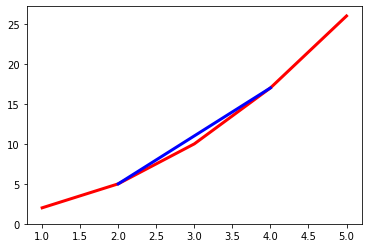

In [213]:
#x = np.linspace(int(intervalo_a), int(intervalo_b))
#y = retorno_funcao(eq_serie, x)
x = pd.Series(range(int(intervalo_a)-1, int(intervalo_b)+2))
y = retorno_funcao(eq_serie, pd.Series(range(int(intervalo_a)-1, int(intervalo_b)+2)))


fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=3)
ax.set_ylim(bottom=0)

teste_x = [intervalo_a, intervalo_b]
teste_y = [retorno_funcao(eq_serie, intervalo_a), retorno_funcao(eq_serie, intervalo_b)]
ax.plot(teste_x, teste_y, 'b', linewidth=3)


plt.show()

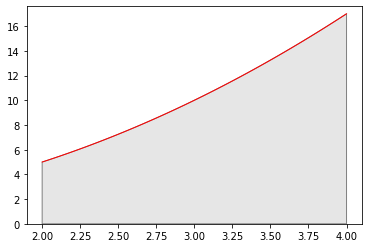

In [214]:
x = np.linspace(int(intervalo_a), int(intervalo_b))
y = retorno_funcao(eq_serie, x)
#x = pd.Series(range(int(intervalo_a)-1, int(intervalo_b)+2))
#y = retorno_funcao(eq_serie, pd.Series(range(int(intervalo_a)-1, int(intervalo_b)+2)))


fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=1)
ax.set_ylim(bottom=0)

ix = np.linspace(intervalo_a, intervalo_b)
iy = retorno_funcao(eq_serie, ix)
verts = [(intervalo_a, 0), *zip(ix, iy), (intervalo_b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)


plt.show()

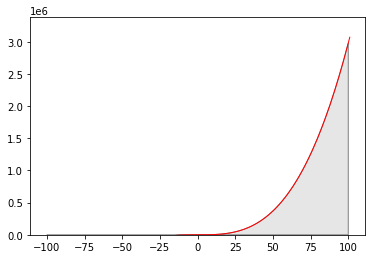

In [194]:
#x = np.linspace(int(intervalo_a), int(intervalo_b))
#y = retorno_funcao(eq_serie, x)
x = pd.Series(range(int(intervalo_a)-1, int(intervalo_b)+2))
y = retorno_funcao(eq_serie, pd.Series(range(int(intervalo_a)-1, int(intervalo_b)+2)))


fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=1)
ax.set_ylim(bottom=0)

ix = np.linspace(intervalo_a, intervalo_b)
iy = retorno_funcao(eq_serie, ix)
verts = [(intervalo_a, 0), *zip(ix, iy), (intervalo_b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)


plt.show()